In [1]:
#составить list необходимых параметров
list_param = ['account_id','client_id', 'time_local', 'time_utc3', 'referrer', 'useragent', 'channel', 'ph_country', 'amount', 
              'deviceid', 'zip_billing', 'country_code_billing', 'version', 'tenor', 'is_js', 'phone', 'mail', 'application_id', 
              'plugins', 'response_content_type', 'cookie']

In [2]:
# извлечение необходимых пара
def get_parameter(line, parameter):
    string = parameter + '='
    len_param = len(string)
    try:
        p_start = line.index(string)+len_param #point_start
        answer = line[p_start:line.find('&', p_start)]
        if 'time' in parameter:
            answer = answer.replace('+',' ').replace('%3A',':')     
    except ValueError:
        answer = 0
    return answer

In [3]:
# хранение данных [время, параметры, ошибки]
dict_param = dict(zip(range(len(list_param)),list_param))
params = [list() for _ in range(len(dict_param))]
list_data = list()
list_error = list()

In [4]:
# чтение из файла
f = open('test.txt', 'r')
for line in f:
    if line[0:2] == '[2':
        list_data.append(line[1:-2])
    if line[0:6] == 'Params':
        for i in range(len(dict_param)):
            params[i].append(get_parameter(line, dict_param.get(i)))
    if line[0:5] == 'Error':
        list_error.append(line[7:-1])
f.close()

In [5]:
#подготовка данных для DataFrame
list_link = (params[x] for x in range(len(list_param)))
dict_df = dict({'datetime': list_data})
dict_df.update(zip(list_param, list_link))
dict_df.update({'error':list_error})

In [6]:
import pandas as pd
df = pd.DataFrame(dict_df)
df.head()

,datetime,account_id,client_id,time_local,time_utc3,referrer,useragent,channel,ph_country,amount,...,version,tenor,is_js,phone,mail,application_id,plugins,response_content_type,cookie,error
0,2019-09-25 04:00:25.451360,0d7f144d5f63b8b6d12aa8730ebdcd38,e2dcd5ca173fd47895fdad914992abb1,25.09.2019 08:00:25,25.09.2019 04:00:25,x,Mozilla%2F5.0+%28Linux%3B+Android+6.0.1%3B+Red...,SITE,62,500000,...,10,28,1,a0c206bbd3d9e1bbcb0e8d7de45c2af8,f6b5aad0293a1956464d78db677677d8,0,0,0,0,"Error, online session is not available. Please..."
1,2019-09-25 04:00:46.710930,0d7f144d5f63b8b6d12aa8730ebdcd38,1ecd7abf6508c4973c9f1cd808545534,25.09.2019 08:00:47,25.09.2019 04:00:47,x,Mozilla%2F5.0+%28Linux%3B+Android+8.1.0%3B+ASU...,SITE,62,2000000,...,10,28,1,ae86f504a3f6219e625f01c118df3146,6ca9922c5e7cd7d092af069d9f06d9e1,0,0,0,0,"Error, online session is not available. Please..."
2,2019-09-25 04:01:34.980043,82eb330fd6ea654a92aefd63284d8ece,887efc10da697c53c83e512e2191ee3b,25.09.2019 09:36:02,25.09.2019 03:36:02,direct,Mozilla%2F5.0+%28Linux%3B+Android+5.1.1%3B+SM-...,SITE,7,5000,...,10,30,1,87902c485854f53d83381bce033c58f4,fdd2c11dd161872cfb9b097a88b095f1,1025091900000020,,json,10ada66fdb6da8232c515fa4d7af3e3b,"Error, online session is not available. Please..."
3,2019-09-25 04:02:25.045196,981593d026c670a0d4af35b811119137,41d47720c6bc246c82f602f359b65cf2,25.09.2019 03:02:25,25.09.2019 04:02:25,url.com%2Fsecure%2Fregistration%2Fstep5,Mozilla%2F5.0+%28Windows+NT+5.1%29+AppleWebKit...,SITE,34,200,...,10,13,1,47c70c7ff14bbd0392c12f6f8d930e6d,8e4d5a01c570162738577fe9ed6480a8,2131983,Chrome+PDF+Viewer+%7C+Shockwave+Flash+%7C+Nati...,json,f1c9ea1bf3f59e447cd1d7429ce73f94,"Error, online session is not available. Please..."
4,2019-09-25 04:02:37.805390,0d7f144d5f63b8b6d12aa8730ebdcd38,8229c51a1933a9ee8e9d6a299df76851,25.09.2019 08:02:38,25.09.2019 04:02:38,x,Mozilla%2F5.0+%28Linux%3B+Android+8.1.0%3B+CPH...,SITE,62,500000,...,10,28,1,75eea68c21a3b1709c254a9dacf49ff0,0195e272da463f98387212c1def7fb45,0,0,0,0,"Error, online session is not available. Please..."


In [7]:
df.to_csv('test.csv')

In [8]:
df.describe()

,datetime,account_id,client_id,time_local,time_utc3,referrer,useragent,channel,ph_country,amount,...,version,tenor,is_js,phone,mail,application_id,plugins,response_content_type,cookie,error
count,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609,...,3609,3609,3609,3609,3609,3609,3609,3609,3609,3609
unique,3609,31,2943,2741,3004,46,1669,3,9,148,...,3,54,3,2634,2427,948,19,2,1791,5
top,2019-09-25 21:38:55.187227,6aa2d1c23beef78ac3c3aaab479e3dee,9986fbbf948017411a215472a453beed,0,25.09.2019%2008:56:30,,0,SITE,7,1000000,...,10,28,1,173bc561c01294279d74b9d665589924,0,0,0,json,0,"Error, online session is not available. Please..."
freq,1,802,8,201,57,1420,444,3547,2047,351,...,3179,784,3349,175,237,2653,2991,1989,1037,3308


In [9]:
df.shape

(3609, 23)

### Анализ данных

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>98,2% запросов через сайт, 1,6% через приложение

In [11]:
df = pd.read_csv('test.csv', index_col='datetime', parse_dates=True)

In [12]:
df.channel.value_counts(normalize=True)

SITE         0.982821
PHONE_APP    0.016625
0            0.000554
Name: channel, dtype: float64

<b>График количества запросов от времени

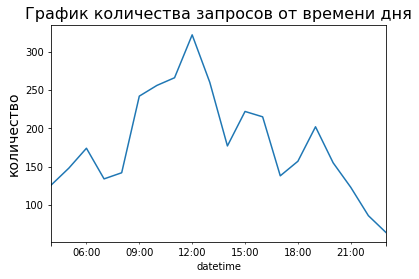

In [13]:
plt.title('График количества запросов от времени дня', fontsize=16)
plt.ylabel('количество', fontsize=14)
df.resample('1h')['account_id'].count().plot();

In [14]:
df.error.unique()

array(['Error, online session is not available. Please, verify js/mobile library installation',
       'Mandatory parameter time_utc3 is empty',
       'Parameter time_utc3 is more then local server time > 65 min',
       'Authentication failed',
       "5:'ascii' codec can't decode byte 0xd0 in position 0: ordinal not in range(128)"],
      dtype=object)

In [15]:
df.error.value_counts()

Error, online session is not available. Please, verify js/mobile library installation    3308
Authentication failed                                                                     295
Parameter time_utc3 is more then local server time > 65 min                                 4
5:'ascii' codec can't decode byte 0xd0 in position 0: ordinal not in range(128)             1
Mandatory parameter time_utc3 is empty                                                      1
Name: error, dtype: int64

<b>У одного аккаунта 289 Authentication failed - фрод?

In [16]:
df[df['error'] == 'Authentication failed']['account_id'].value_counts()

22d039994e86d6468bb8dbd4467c0b98    289
123641d47167dcc5792126d813b5530f      4
0                                     2
Name: account_id, dtype: int64

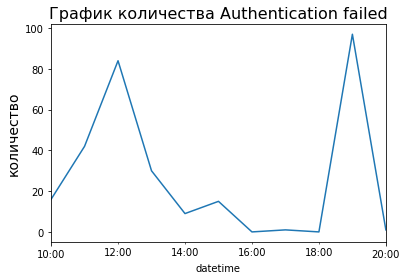

In [17]:
plt.title('График количества Authentication failed', fontsize=16)
plt.ylabel('количество', fontsize=14)
df[df['error'] == 'Authentication failed'].resample('1h')['account_id'].count().plot();

<b>Тип устройства пользователя

In [18]:
def type_useragent(x):
    if 'ANDROID' in x.upper():
        return 'android'
    if 'iPhone' in x:
        return 'iPhone'
    if 'Windows' in x:
        return 'Windows'
    if x == '0':
        return '0'
    return 'Other'   

In [19]:
df['type_useragent'] = df.useragent.apply(type_useragent)

In [20]:
df.type_useragent.value_counts()

android    2197
0           446
Windows     360
Other       306
iPhone      300
Name: type_useragent, dtype: int64

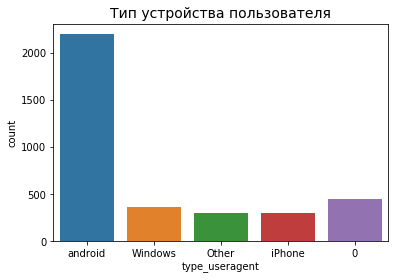

In [21]:
plt.title('Тип устройства пользователя', fontsize=14)
sns.countplot(df.type_useragent);

<b> Распределение amount

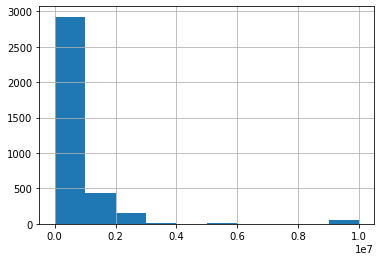

In [22]:
df.amount.hist()

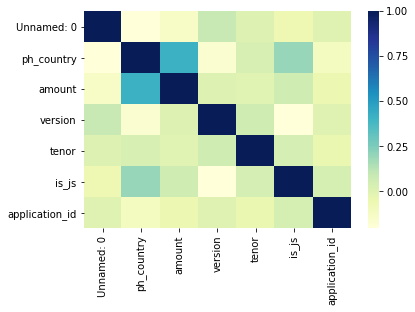

In [23]:
sns.heatmap(df.corr(), cmap="YlGnBu");

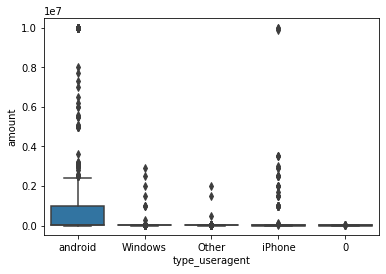

In [24]:
sns.boxplot(x='type_useragent', y='amount', data=df);

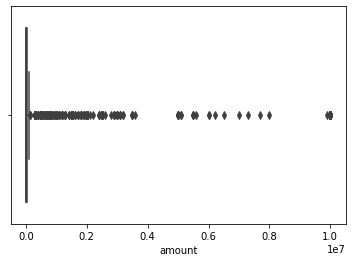

In [25]:
sns.boxplot(df['amount']);